<a href="https://colab.research.google.com/github/nayrr25/M-1000-IA/blob/main/N4_S3_Pr%C3%A1ctica_Redes_Neuronales_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica - Redes Neuronales

# Importación de Librerías
En esta sección importamos todas las librerías necesarias para la notebook. TensorFlow es usado para construir y entrenar el modelo, Matplotlib y Seaborn para la visualización, y Scikit-learn para el preprocesamiento y evaluación del modelo.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## TensorFlow

TensorFlow es una biblioteca de código abierto para cálculo numérico y aprendizaje automático que facilita la construcción y entrenamiento de modelos de redes neuronales. Desarrollada por el equipo de Google Brain, ofrece una gama completa de herramientas, bibliotecas y recursos de la comunidad que permiten a los investigadores y desarrolladores construir y desplegar modelos de aprendizaje automático de forma eficiente. TensorFlow es conocido por su flexibilidad y capacidad de escalar el procesamiento a múltiples CPUs o GPUs, lo cual es crucial para manejar grandes conjuntos de datos y entrenar modelos complejos.

TensorFlow permite definir grafos de cómputo que especifican cómo se mueven los datos y cómo se calculan las operaciones matemáticas en esos datos. La ejecución diferida de estos grafos permite optimizaciones que hacen más eficiente la computación, especialmente en hardware especializado.


## Keras

Keras es una API de redes neuronales de alto nivel escrita en Python que funciona como una envoltura sobre TensorFlow. Diseñada para la experimentación rápida y la implementación sencilla de modelos de aprendizaje automático, Keras es conocida por su facilidad de uso y por su diseño modular y extensible. Fue desarrollada con el objetivo de permitir una prototipación rápida y sin complicaciones, apoyando a la vez tanto redes convolucionales como redes recurrentes, así como la combinación de ambas.

Desde TensorFlow 2.0, Keras está integrada directamente en TensorFlow como `tf.keras`, lo que hace que la construcción y el entrenamiento de modelos sean más accesibles al proporcionar APIs de alto nivel. Keras ha ganado popularidad en la comunidad de aprendizaje automático debido a su interfaz intuitiva y a que reduce la cantidad de código necesario para crear soluciones complejas de aprendizaje profundo.


# Carga y Visualización del Dataset MNIST
El dataset MNIST contiene imágenes de dígitos escritos a mano, etiquetados del 0 al 9. Cada imagen tiene una resolución de 28x28 píxeles. Aquí cargamos el dataset y mostramos algunas imágenes de ejemplo.


11490434/11490434 [==============================] - 2s 0us/step
Volumen del dataset: 70000
Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de prueba: (10000, 28, 28)


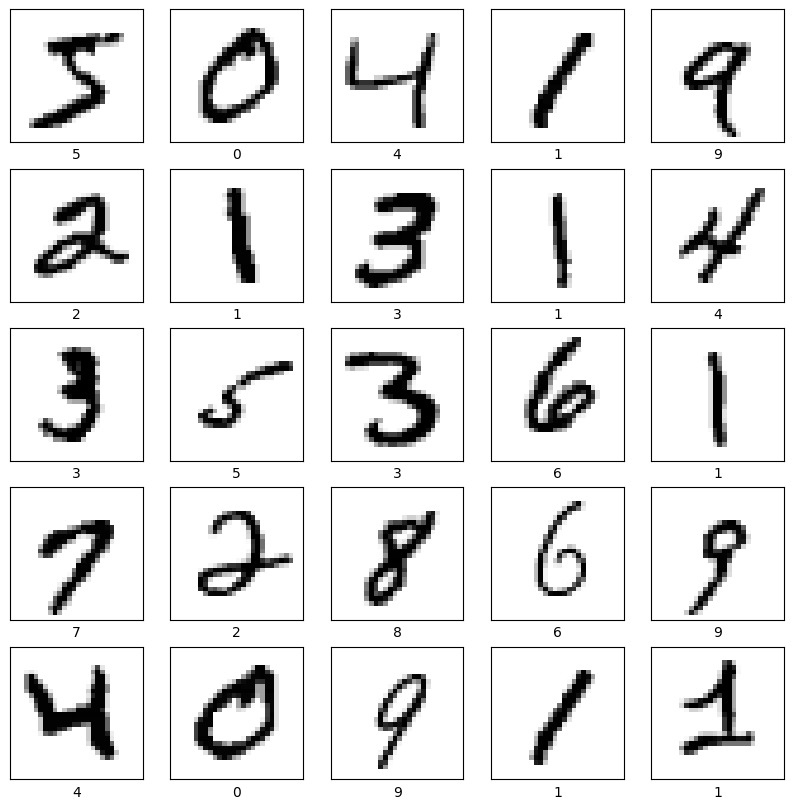

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Volumen del dataset: {len(train_images)+len(test_images)}")
print(f"Imágenes de entrenamiento: {train_images.shape}")
print(f"Imágenes de prueba: {test_images.shape}")

# Visualización de imágenes del dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Análisis Exploratorio del Dataset
Aquí exploramos el balanceo de clases en ambos set de datos (entrenamiento y test) y las características de las imágenes en el dataset MNIST (cantidad de píxeles y canales)


In [ ]:
# Chequeo del balanceo de clases
print("Distribución de clases para el conjunto de entrenamiento:")
for i in range(10):
    print(f"Clase {i} - Número de imágenes: {np.bincount(train_labels)[i]}")

print("\nDistribución de clases para el conjunto de prueba:")
for i in range(10):
    print(f"Clase {i} - Número de imágenes: {np.bincount(test_labels)[i]}")

# Detalles del dataset
image_shape = train_images[0].shape
print(f"\nResolución de las imágenes: {image_shape}")
print("Cantidad de canales: 1 (escala de grises)")

Distribución de clases para el conjunto de entrenamiento:
Clase 0 - Número de imágenes: 5923
Clase 1 - Número de imágenes: 6742
Clase 2 - Número de imágenes: 5958
Clase 3 - Número de imágenes: 6131
Clase 4 - Número de imágenes: 5842
Clase 5 - Número de imágenes: 5421
Clase 6 - Número de imágenes: 5918
Clase 7 - Número de imágenes: 6265
Clase 8 - Número de imágenes: 5851
Clase 9 - Número de imágenes: 5949

Distribución de clases para el conjunto de prueba:
Clase 0 - Número de imágenes: 980
Clase 1 - Número de imágenes: 1135
Clase 2 - Número de imágenes: 1032
Clase 3 - Número de imágenes: 1010
Clase 4 - Número de imágenes: 982
Clase 5 - Número de imágenes: 892
Clase 6 - Número de imágenes: 958
Clase 7 - Número de imágenes: 1028
Clase 8 - Número de imágenes: 974
Clase 9 - Número de imágenes: 1009

Resolución de las imágenes: (28, 28)
Cantidad de canales: 1 (escala de grises)


# Construcción de la Arquitectura de la Red
En esta sección construimos el modelo usando Keras. La red consta de una capa de entrada que aplana la imagen, seguida de una capa oculta con 128 neuronas y activación ReLU, y una capa de salida con activación softmax para clasificar las 10 posibles etiquetas.


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)), #Convierte la imagen de 28x28 en una tira de 784 valores
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Cálculo de Parámetros en Redes Neuronales

Cada capa dentro de una red neuronal tiene un conjunto de parámetros que se aprenden durante el entrenamiento. Los parámetros en una capa densa (también conocida como "fully connected") se calculan tomando en cuenta las conexiones entre las neuronas de las capas consecutivas.

Para una capa densa, el número de parámetros es el producto del número de entradas de la capa (incluyendo el término del sesgo) por el número de neuronas en esa capa. Por ejemplo, si una capa densa recibe una entrada de tamaño 784 y tiene 256 neuronas, tendrá \( (784 + 1) * 128 \) parámetros, donde el "+1" representa el sesgo (bias) agregado a cada neurona.

La última capa, que es nuestra capa de salida, tiene 10 neuronas para las 10 clases de dígitos y recibe entradas de 128 neuronas de la capa anterior. Por lo tanto, tendrá \( (128 + 1) * 10 \) parámetros.

El total de parámetros de la red es la suma de los parámetros de todas las capas individuales.


# Compilación del modelo
Compilamos el modelo especificando el optimizador Adam, la función de pérdida de entropía cruzada y la métrica de precisión. Luego, dividimos los datos en conjuntos de entrenamiento y validación.

In [ ]:
# Crear una instancia del optimizador Adam con un learning rate específico
adam = tf.keras.optimizers.Adam(learning_rate=0.001)  # 0.001 es el valor predeterminado de learning rate para Adam en muchas versiones de TensorFlow

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# División del dataset en train y test
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## Optimizadores, Funciones de Pérdida y Métricas

**Optimizadores**: Un optimizador es un algoritmo para actualizar los pesos de la red con el fin de minimizar la función de pérdida. Ejemplos comunes incluyen SGD (descenso de gradiente estocástico), Adam y RMSprop. Adam es popular debido a su uso de momentos adaptativos, que lo hace robusto a cambios en la topología del gradiente.

**Funciones de Pérdida**: La función de pérdida calcula la diferencia entre las predicciones del modelo y los verdaderos valores. Por ejemplo, la entropía cruzada se utiliza comúnmente en problemas de clasificación porque mide la distancia entre dos distribuciones de probabilidad - la verdad real y las predicciones.

**Métricas**: Las métricas evalúan el rendimiento del modelo. A diferencia de la función de pérdida, las métricas no se utilizan en el proceso de entrenamiento y son únicamente para interpretación humana. La precisión es una métrica estándar para la clasificación que mide la proporción de predicciones correctas sobre el total de predicciones.


## Selección de Hyperparámetros y Componentes del Modelo

### Optimizador Adam
Usamos el optimizador Adam porque combina las ventajas de otros dos enfoques de optimización: AdaGrad y RMSProp. Adam calcula tasas de aprendizaje adaptativas para cada parámetro. Además, utiliza la estimación del primer y segundo momento de los gradientes para adaptarse al paisaje de la función de error, lo que lo hace eficaz en práctica para problemas de optimización en redes neuronales.

### Función de Pérdida Sparse Categorical Crossentropy
La función sparse_categorical_crossentropy es una elección adecuada para problemas de clasificación multiclase donde las etiquetas son proporcionadas como enteros. La "sparse" en el nombre indica que estamos utilizando una versión que maneja etiquetas como enteros. La fórmula de la entropía cruzada categórica es:

\[
H(y, \hat{y}) = -\sum_{i} y_{i} \log(\hat{y}_{i})
\]

donde \( y \) es la etiqueta verdadera en formato one-hot y \( \hat{y} \) es la distribución de probabilidad predicha por el modelo.

### Métrica de Precisión (Accuracy)
La métrica de precisión se utiliza para medir la proporción de etiquetas verdaderas que fueron predichas correctamente por el modelo. Es intuitiva y ampliamente usada en clasificación porque proporciona una medida directa del rendimiento del modelo en tareas de clasificación.


# Entrenamiento del Modelo

In [ ]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 3.3784 - accuracy: 0.8605 - val_loss: 0.6528 - val_accuracy: 0.8712
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4433 - accuracy: 0.9002 - val_loss: 0.5196 - val_accuracy: 0.8809
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3214 - accuracy: 0.9248 - val_loss: 0.4015 - val_accuracy: 0.9050
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2652 - accuracy: 0.9354 - val_loss: 0.3440 - val_accuracy: 0.9317
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2477 - accuracy: 0.9395 - val_loss: 0.2601 - val_accuracy: 0.9398
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2194 - accuracy: 0.9458 - val_loss: 0.2562 - val_accuracy: 0.9453
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2134 - accuracy: 0.9489 - val_loss: 0.2487 - val_accuracy:

## Hyperparámetros del Entrenamiento

### Tamaño de Batch (Batch Size)
El tamaño del batch es el número de muestras de entrenamiento utilizadas en una iteración. Un tamaño de batch más pequeño puede proporcionar una actualización de los pesos más "ruidosa" o estocástica, lo que puede llevar a una convergencia más rápida pero también puede causar una inestabilidad en el entrenamiento.

### Número de Épocas (Number of Epochs)
Una época es una pasada completa a través de todo el conjunto de datos de entrenamiento. El número de épocas define cuántas veces el modelo verá todo el conjunto de datos. Necesitamos suficientes épocas para asegurarnos de que el modelo aprenda de todos los datos, pero demasiadas pueden llevar a sobreajustar.

### Tasa de Aprendizaje (Learning Rate)
La tasa de aprendizaje define el tamaño del paso que se toma durante la optimización. Es un hyperparámetro crítico porque un valor muy alto puede hacer que el modelo no converja, mientras que un valor muy bajo puede hacer que el entrenamiento sea innecesariamente lento. La tasa de aprendizaje se especifica generalmente en la configuración del optimizador.


# Evaluación del Modelo y Visualización de Resultados
Después de entrenar el modelo, evaluamos su rendimiento en el conjunto de prueba y visualizamos las curvas de entrenamiento y validación.


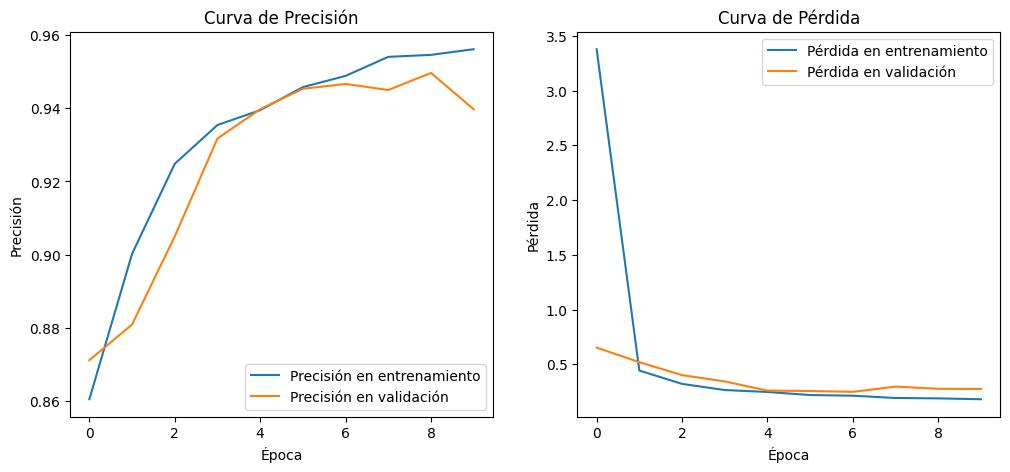

313/313 - 1s - loss: 0.2877 - accuracy: 0.9423 - 632ms/epoch - 2ms/step
Exactitud en el conjunto de prueba: 0.942300021648407


In [ ]:
# Gráficas de entrenamiento y validación
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Curva de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Exactitud en el conjunto de prueba: {test_acc}')

# Visualización de Métricas de Evaluación
Utilizamos Seaborn para crear una visualización de la matriz de confusión y mejorar la interpretación de los resultados del modelo.


313/313 [==============================] - 1s 1ms/step


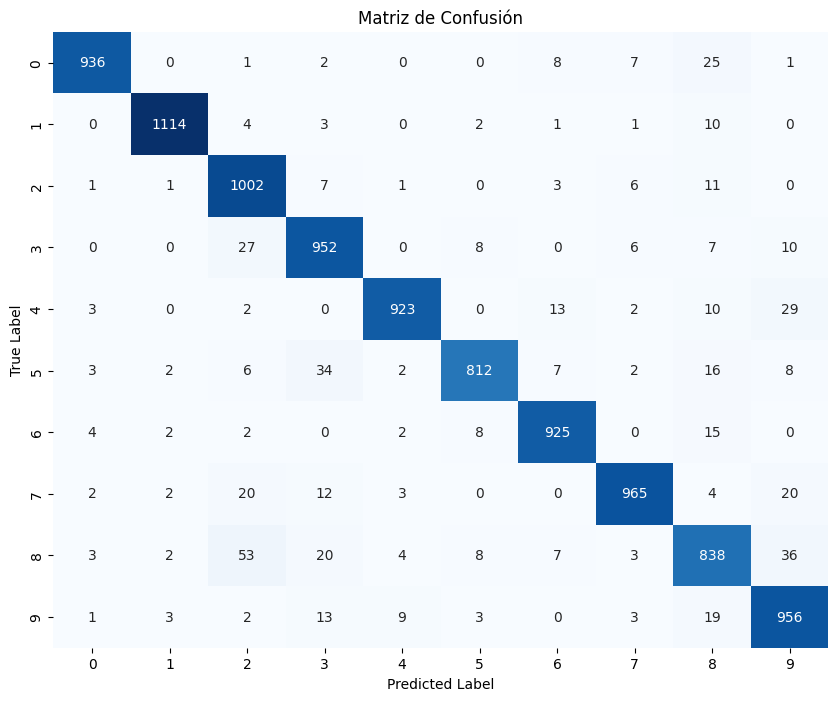

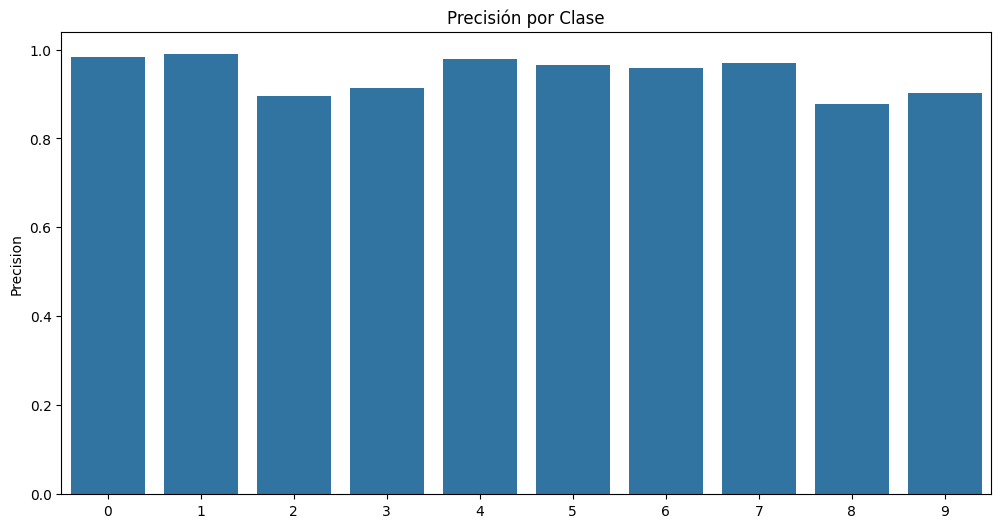

In [ ]:
# Obteniendo la matriz de confusión y el reporte de clasificación
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(test_labels, predicted_classes)
clas_report = classification_report(test_labels, predicted_classes, output_dict=True)

# Visualización de la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

# Visualización del reporte de clasificación
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=list(clas_report.keys())[:-3], y=[d['precision'] for d in list(clas_report.values())[:-3]], ax=ax)
ax.set_ylabel('Precision')
ax.set_title('Precisión por Clase')
plt.show()

# Construcción de una Arquitectura de Red Mejorada
Esta versión del modelo MLP tiene capas adicionales y más neuronas para mejorar la capacidad del modelo de aprender características más complejas. También introducimos Dropout como una técnica de regularización para ayudar a prevenir el sobreajuste.


In [ ]:
from tensorflow.keras.layers import Dropout

# Definir el modelo
model_improved = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_improved.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Resumen del modelo mejorado
model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 26932

## Entendiendo las Capas de la Red Neuronal

### Flatten
La capa Flatten se utiliza para convertir la entrada multidimensional en un vector unidimensional. Por ejemplo, una imagen de 28x28 se aplanará en un vector de 784 valores, preparándola para la entrada en la primera capa densa de la red.

### Dense
Las capas Dense son capas de red neuronal "completamente conectadas". Cada neurona en una capa densa recibe entradas de todas las neuronas de la capa anterior, lo que las hace densas.

### Dropout
La capa de Dropout es una técnica de regularización. Durante el entrenamiento, algunas unidades (neuronas) se desactivan aleatoriamente (es decir, sus pesos no se actualizan) para evitar el sobreajuste. Esto asegura que la red no se vuelva demasiado dependiente de ningún nodo de entrada en particular.


## Funciones de Activación

Las funciones de activación en una red neuronal definen cómo se transforman las entradas lineales a las neuronas en salidas no lineales. Son cruciales para que las redes neuronales puedan aprender y representar complejas funciones no lineales.

- **ReLU (Rectified Linear Unit)**: Es la más utilizada en las capas ocultas porque es eficiente y reduce el problema de desvanecimiento de gradientes. Funciona bien en la mayoría de los casos.

- **Sigmoid**: Se usa para probabilidades al final de la red debido a su rango de salida (0, 1), pero es susceptible al desvanecimiento de gradientes y no se recomienda para capas ocultas.

- **Tanh**: Similar a la sigmoid pero con un rango de salida (-1, 1). A veces se utiliza en capas ocultas, pero también puede sufrir desvanecimiento de gradientes.

- **Softmax**: Se utiliza en la capa de salida de problemas de clasificación multiclase, ya que la salida puede interpretarse como una distribución de probabilidad.


# Entrenamiento del Modelo Mejorado
Entrenamos el nuevo modelo con la misma división de datos de entrenamiento y validación, pero consideraremos ajustar el número de épocas y el tamaño del batch si es necesario basándonos en el comportamiento de las curvas de aprendizaje.


In [ ]:
# Entrenar el modelo mejorado
history_improved = model_improved.fit(
    X_train, y_train,
    epochs=20,  # Puede incrementar las épocas si es necesario
    batch_size=16,  # Un batch size menor puede mejorar la precisión
    validation_data=(X_val, y_val)
)

Epoch 1/20
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3913 - accuracy: 0.9179 - val_loss: 0.2252 - val_accuracy: 0.9524
Epoch 2/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2882 - accuracy: 0.9357 - val_loss: 0.2447 - val_accuracy: 0.9489
Epoch 3/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2951 - accuracy: 0.9343 - val_loss: 0.2559 - val_accuracy: 0.9524
Epoch 4/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2867 - accuracy: 0.9364 - val_loss: 0.2027 - val_accuracy: 0.9524
Epoch 5/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2856 - accuracy: 0.9365 - val_loss: 0.2031 - val_accuracy: 0.9563
Epoch 6/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2630 - accuracy: 0.9399 - val_loss: 0.2862 - val_accuracy: 0.9486
Epoch 7/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2668 - accuracy: 0.9381 - val_loss: 0.2409 - val_ac

# Evaluación del Modelo Mejorado y Visualización de Resultados
Evaluamos cómo el modelo mejorado se desempeña en el conjunto de prueba y visualizamos las curvas de entrenamiento y validación para comparar con el modelo anterior.


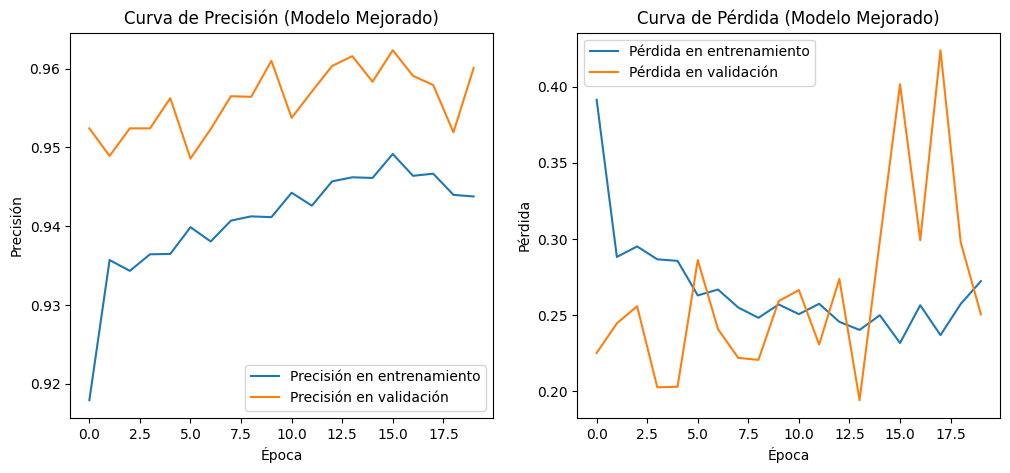

313/313 - 1s - loss: 0.2405 - accuracy: 0.9647 - 530ms/epoch - 2ms/step
Exactitud en el conjunto de prueba (Modelo Mejorado): 0.9646999835968018


In [ ]:
# Visualización de resultados para el modelo mejorado
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history_improved.history['val_accuracy'], label='Precisión en validación')
plt.title('Curva de Precisión (Modelo Mejorado)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history_improved.history['val_loss'], label='Pérdida en validación')
plt.title('Curva de Pérdida (Modelo Mejorado)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación del modelo mejorado
test_loss_improved, test_acc_improved = model_improved.evaluate(test_images, test_labels, verbose=2)
print(f'Exactitud en el conjunto de prueba (Modelo Mejorado): {test_acc_improved}')

313/313 [==============================] - 0s 1ms/step


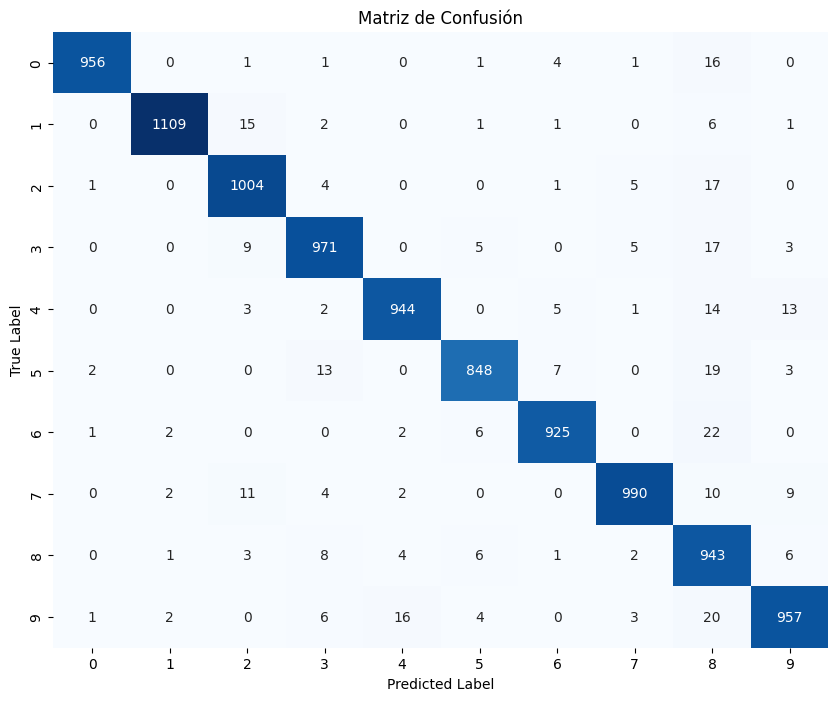

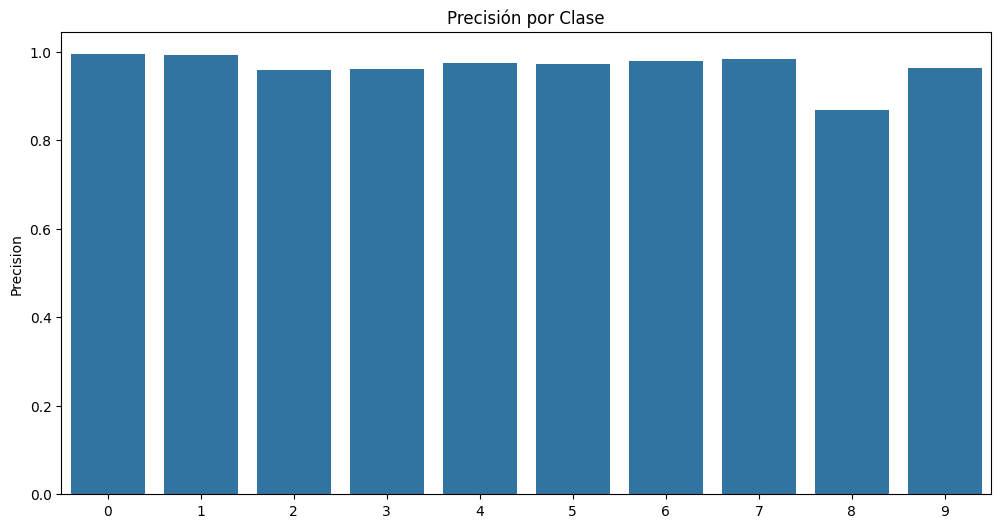

In [ ]:
# Obteniendo la matriz de confusión y el reporte de clasificación
predictions = model_improved.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(test_labels, predicted_classes)
clas_report = classification_report(test_labels, predicted_classes, output_dict=True)

# Visualización de la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

# Visualización del reporte de clasificación
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=list(clas_report.keys())[:-3], y=[d['precision'] for d in list(clas_report.values())[:-3]], ax=ax)
ax.set_ylabel('Precision')
ax.set_title('Precisión por Clase')
plt.show()

313/313 [==============================] - 0s 2ms/step


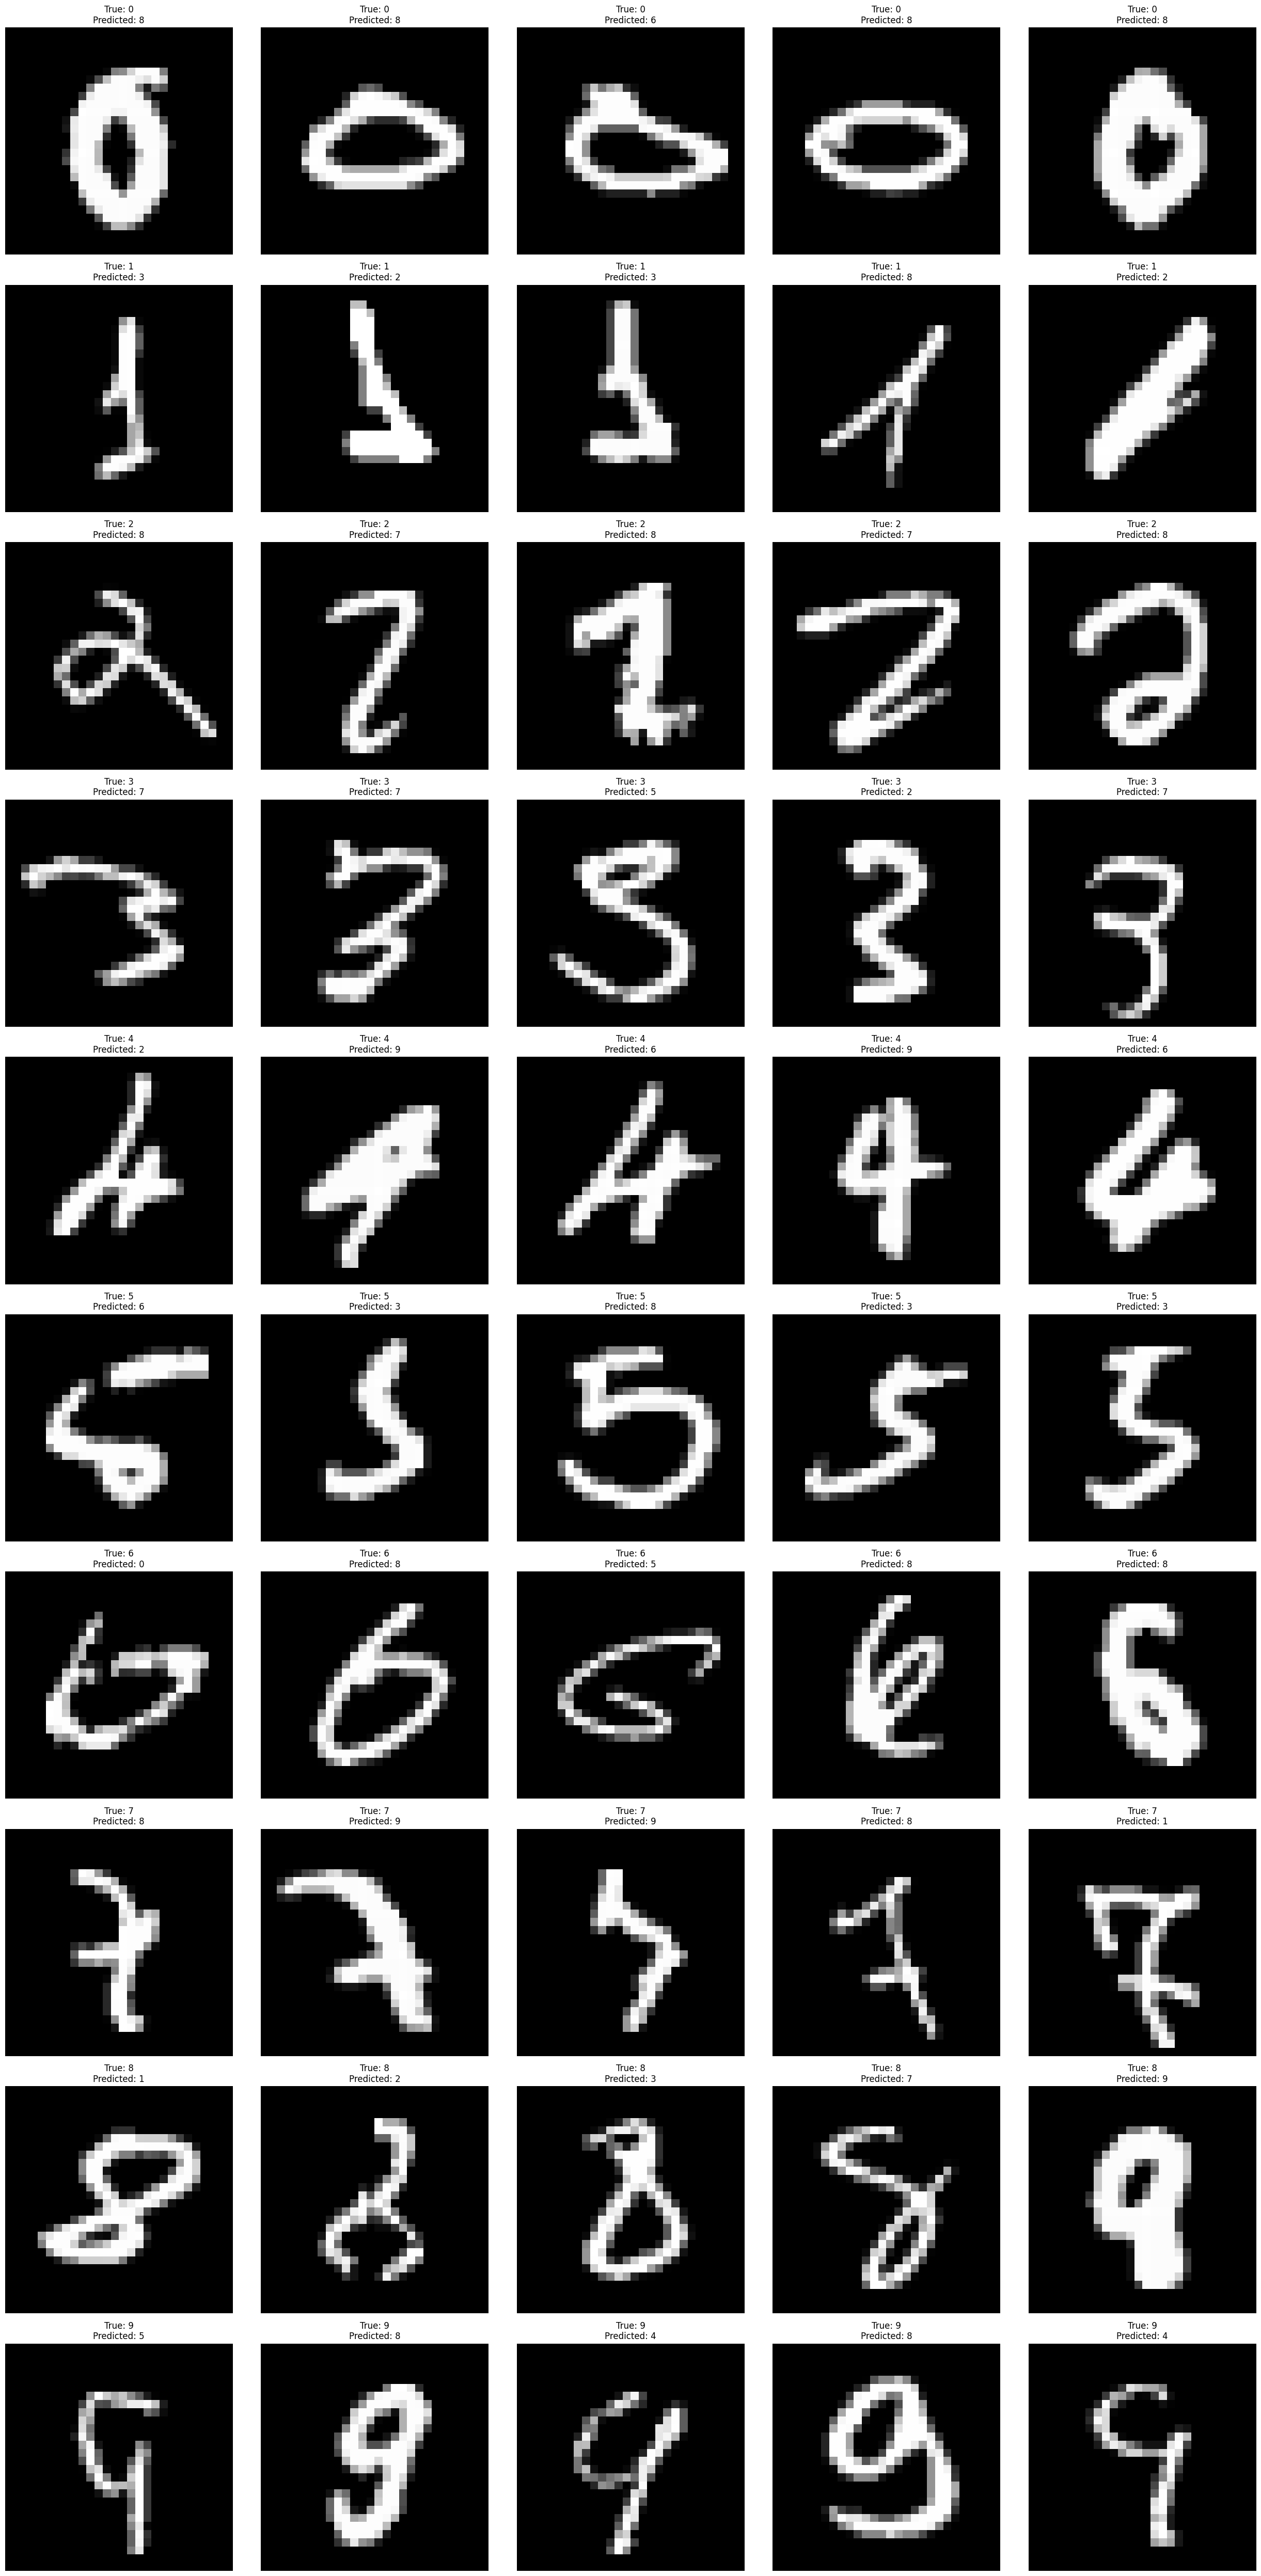

In [ ]:
# Continuación de la función para mostrar las imágenes mal clasificadas de cada clase
def plot_misclassified_images(model, images, true_labels, predicted_labels, class_names, max_images=5):
    misclassified_idx = np.where(predicted_labels != true_labels)[0]
    num_classes = len(class_names)
    fig, axes = plt.subplots(num_classes, max_images, figsize=(5*max_images, 5*num_classes))

    for i in range(num_classes):
        class_misclassified_idx = misclassified_idx[true_labels[misclassified_idx] == i]
        if not class_misclassified_idx.size:
            continue
        for j in range(max_images):
            if j < len(class_misclassified_idx):
                img_idx = class_misclassified_idx[j]
                ax = axes[i, j] if num_classes > 1 else axes[j]
                ax.imshow(images[img_idx], cmap='gray')
                ax.set_title(f'True: {class_names[true_labels[img_idx]]}\nPredicted: {class_names[predicted_labels[img_idx]]}')
                ax.axis('off')
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Obteniendo las predicciones del modelo
predictions = model_improved.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Define class_names if not already defined
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Mostrando las imágenes mal clasificadas
plot_misclassified_images(model, test_images, test_labels, predicted_classes, class_names)

In [ ]:
# Cálculo de predicciones incorrectas
incorrect_predictions = np.nonzero(predicted_classes != test_labels)[0]
total_incorrect = len(incorrect_predictions)
total_test_samples = len(test_labels)

# Mostrar el total de predicciones incorrectas y el total de muestras de test
print(f'Total de predicciones incorrectas: {total_incorrect}')
print(f'Total de muestras en el conjunto de test: {total_test_samples}')

# Calcular y mostrar la proporción de predicciones incorrectas
incorrect_ratio = total_incorrect / total_test_samples
print(f'Proporción de predicciones incorrectas sobre el total de test: {incorrect_ratio:.2%}')

Total de predicciones incorrectas: 353
Total de muestras en el conjunto de test: 10000
Proporción de predicciones incorrectas sobre el total de test: 3.53%


## Conclusiones sobre la Comparativa de Modelos MLP

Tras implementar y evaluar dos arquitecturas distintas de redes neuronales MLP para la clasificación de dígitos manuscritos del dataset MNIST, observamos que la segunda arquitectura, con su diseño más complejo y técnicas de regularización, superó al modelo base en términos de precisión. Las principales razones de esta mejora son:

- **Mayor Profundidad y Complejidad**: La adición de capas ocultas y un mayor número de neuronas permitió que el modelo mejorado capturara características más abstractas y sutiles de los datos.

- **Regularización mediante Dropout**: La introducción de capas de Dropout ayudó a prevenir el sobreajuste, lo cual es particularmente útil dado el aumento de la capacidad del modelo.

- **Optimización de Hiperparámetros**: Ajustar el tamaño de batch y el número de épocas según la respuesta del modelo durante el entrenamiento también contribuyó a alcanzar una mayor precisión.

La mejora en la precisión, aunque significativa, también debe ser valorada en el contexto de la complejidad computacional. El modelo mejorado puede requerir más recursos de cálculo y tiempo para entrenar, lo cual es un factor importante a considerar en la implementación práctica.


## Redes Neuronales Convolucionales (CNN) como Mejora Sobre MLP para Tareas de Visión por Computadora

Mientras que los modelos MLP han demostrado ser útiles para tareas simples de clasificación de imágenes, las Redes Neuronales Convolucionales (CNN) están específicamente diseñadas para el procesamiento de imágenes y tienden a superar a los MLP en tareas más complejas de visión por computadora. Las CNN toman en cuenta la estructura espacial de las imágenes mediante el uso de filtros convolucionales, lo que les permite capturar patrones locales como bordes, texturas y otros atributos visuales importantes.

Las capas convolucionales también ayudan a reducir la dimensionalidad de los datos de entrada mientras mantienen las características esenciales, lo que permite que las CNN manejen eficientemente imágenes de alta resolución. Además, las capas de pooling en las CNN reducen aún más la dimensionalidad y hacen que la red sea invariante a pequeñas traslaciones y distorsiones en la imagen.

Por lo tanto, aunque nuestro modelo MLP mejorado ha logrado una precisión notable, una CNN probablemente mejoraría aún más el rendimiento en esta tarea de clasificación de imágenes. Esto se debe a la capacidad de las CNN de aprovechar la naturaleza espacial de los datos de imagen y de construir representaciones jerárquicas de características que son altamente informativas para la tarea de clasificación.